# Farm Counts

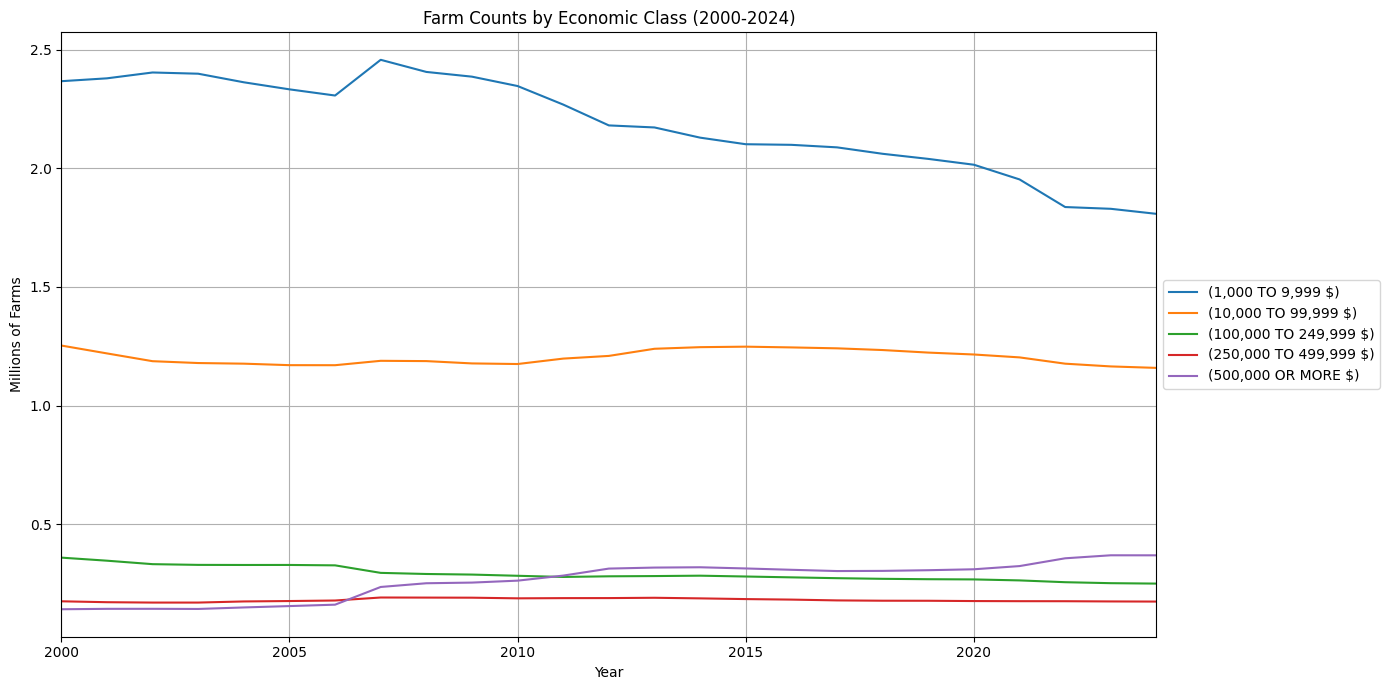

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data
df = pd.read_csv("Farms.csv")

df = df[df["Data Item"] == "FARM OPERATIONS - NUMBER OF OPERATIONS"]

# Clean function
def clean_col(df, col):
    return (
        df[col]
        .astype(str)
        .str.replace(",", "")
        .str.replace(r"\(D\)", "", regex=True)
        .str.strip()
        .replace("", pd.NA)
        .pipe(pd.to_numeric, errors="coerce")
    )

# Column definitions
base_classes = [
    "ECONOMIC CLASS: (1,000 TO 9,999 $)  -  <b>VALUE</b>",
    "ECONOMIC CLASS: (10,000 TO 99,999 $)  -  <b>VALUE</b>",
    "ECONOMIC CLASS: (100,000 TO 249,999 $)  -  <b>VALUE</b>",
    "ECONOMIC CLASS: (250,000 TO 499,999 $)  -  <b>VALUE</b>"
]

combo_cols = {
    "legacy": "ECONOMIC CLASS: (500,000 OR MORE $)  -  <b>VALUE</b>",
    "split_1": "ECONOMIC CLASS: (500,000 TO 999,999 $)  -  <b>VALUE</b>",
    "split_2": "ECONOMIC CLASS: (1,000,000 OR MORE $)  -  <b>VALUE</b>",
    "combo": "ECONOMIC CLASS: (500,000 OR MORE $)  -  <b>VALUE</b>"
}

# Clean all used columns
for col in base_classes + list(combo_cols.values())[:-1]:
    if col in df.columns:
        df[col] = clean_col(df, col)

# Create the combined $500k+ column
def combine_high_income(row):
    if pd.notna(row[combo_cols["legacy"]]):
        return row[combo_cols["legacy"]]
    elif pd.notna(row[combo_cols["split_1"]]) or pd.notna(row[combo_cols["split_2"]]):
        return (row[combo_cols["split_1"]] or 0) + (row[combo_cols["split_2"]] or 0)
    return pd.NA

df[combo_cols["combo"]] = df.apply(combine_high_income, axis=1)

# Prepare final dataframe
final_cols = base_classes + [combo_cols["combo"]]
df_final = df[["Year"] + final_cols].copy()
df_final[combo_cols["combo"]] = pd.to_numeric(df_final[combo_cols["combo"]], errors="coerce")

# Group and filter
df_grouped = df_final.groupby("Year").sum(min_count=1).reset_index()
df_grouped = df_grouped[df_grouped["Year"] >= 2000]

# Plot FARM COUNTS
plt.figure(figsize=(14, 7))
for col in df_grouped.columns[1:]:
    series = df_grouped[["Year", col]].copy()
    first_valid_idx = series[col].first_valid_index()
    if first_valid_idx is not None:
        first_valid_year = series.loc[first_valid_idx, "Year"]
        series = series[(series["Year"] >= first_valid_year) & (series["Year"] >= 2000)]
        label = col.split(": ")[1].split("  -")[0] if ": " in col else col.replace("ECONOMIC CLASS: ", "").replace("  -  <b>VALUE</b>", "")
        plt.plot(series["Year"], series[col] / 1e6, label=label)

plt.title("Farm Counts by Economic Class (2000-2024)")
plt.xlabel("Year")
plt.ylabel("Millions of Farms")
plt.xticks(ticks=list(range(2000, 2025, 5)))  # every 5 years from 2000 to 2024
plt.xlim(2000, 2024)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()



# Land in Farms

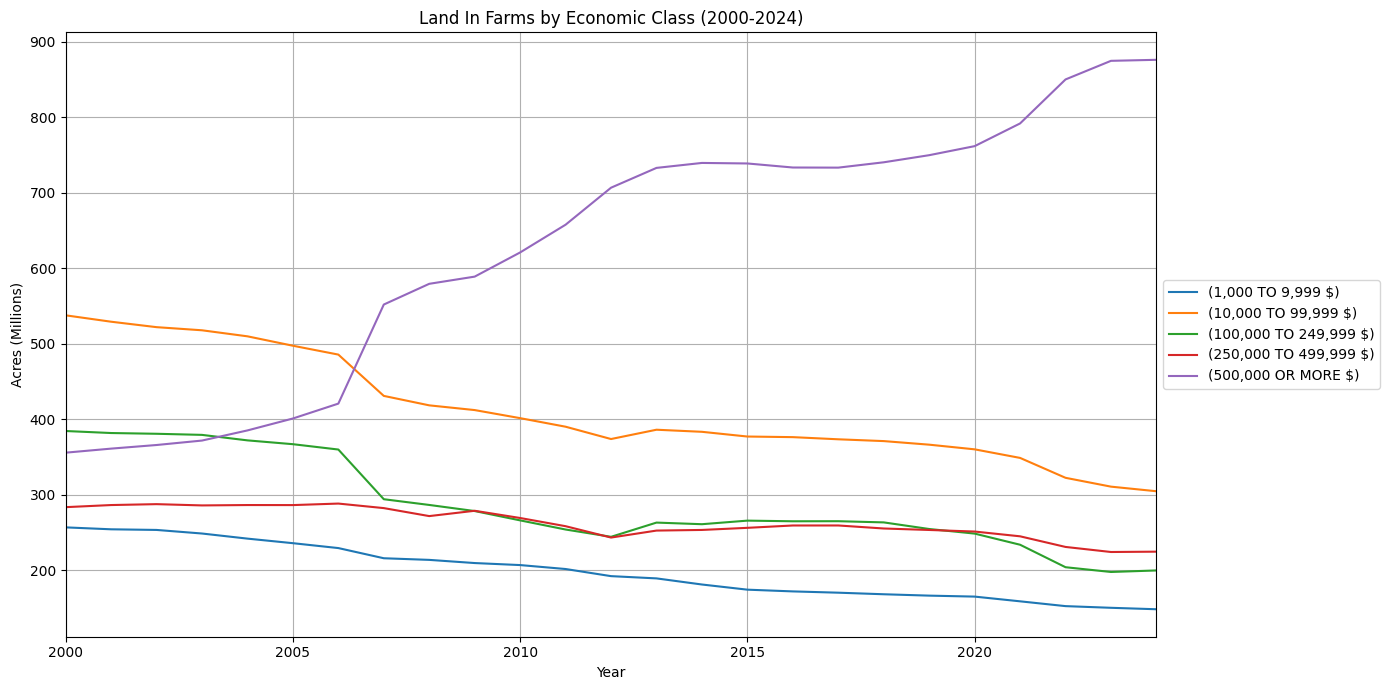

In [2]:

# Load data
df = pd.read_csv("Farms.csv")

df = df[df["Data Item"] == "FARM OPERATIONS - ACRES OPERATED"]

# Clean function
def clean_col(df, col):
    return (
        df[col]
        .astype(str)
        .str.replace(",", "")
        .str.replace(r"\(D\)", "", regex=True)
        .str.strip()
        .replace("", pd.NA)
        .pipe(pd.to_numeric, errors="coerce")
    )

# Column definitions
base_classes = [
    "ECONOMIC CLASS: (1,000 TO 9,999 $)  -  <b>VALUE</b>",
    "ECONOMIC CLASS: (10,000 TO 99,999 $)  -  <b>VALUE</b>",
    "ECONOMIC CLASS: (100,000 TO 249,999 $)  -  <b>VALUE</b>",
    "ECONOMIC CLASS: (250,000 TO 499,999 $)  -  <b>VALUE</b>"
]

combo_cols = {
    "legacy": "ECONOMIC CLASS: (500,000 OR MORE $)  -  <b>VALUE</b>",
    "split_1": "ECONOMIC CLASS: (500,000 TO 999,999 $)  -  <b>VALUE</b>",
    "split_2": "ECONOMIC CLASS: (1,000,000 OR MORE $)  -  <b>VALUE</b>",
    "combo": "ECONOMIC CLASS: (500,000 OR MORE $)  -  <b>VALUE</b>"
}

# Clean all used columns
for col in base_classes + list(combo_cols.values())[:-1]:
    if col in df.columns:
        df[col] = clean_col(df, col)

# Create the combined $500k+ column
def combine_high_income(row):
    if pd.notna(row[combo_cols["legacy"]]):
        return row[combo_cols["legacy"]]
    elif pd.notna(row[combo_cols["split_1"]]) or pd.notna(row[combo_cols["split_2"]]):
        return (row[combo_cols["split_1"]] or 0) + (row[combo_cols["split_2"]] or 0)
    return pd.NA

df[combo_cols["combo"]] = df.apply(combine_high_income, axis=1)

# Prepare final dataframe
final_cols = base_classes + [combo_cols["combo"]]
df_final = df[["Year"] + final_cols].copy()
df_final[combo_cols["combo"]] = pd.to_numeric(df_final[combo_cols["combo"]], errors="coerce")

# Group and filter
df_grouped = df_final.groupby("Year").sum(min_count=1).reset_index()
df_grouped = df_grouped[df_grouped["Year"] >= 2000]

# Plot FARM COUNTS
plt.figure(figsize=(14, 7))
for col in df_grouped.columns[1:]:
    series = df_grouped[["Year", col]].copy()
    first_valid_idx = series[col].first_valid_index()
    if first_valid_idx is not None:
        first_valid_year = series.loc[first_valid_idx, "Year"]
        series = series[(series["Year"] >= first_valid_year) & (series["Year"] >= 2000)]
        label = col.split(": ")[1].split("  -")[0] if ": " in col else col.replace("ECONOMIC CLASS: ", "").replace("  -  <b>VALUE</b>", "")
        plt.plot(series["Year"], series[col] / 1e6, label=label)

plt.title("Land In Farms by Economic Class (2000-2024)")
plt.xlabel("Year")
plt.ylabel("Acres (Millions)")
plt.xticks(ticks=list(range(2000, 2025, 5)))  # every 5 years from 2000 to 2024
plt.xlim(2000, 2024)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


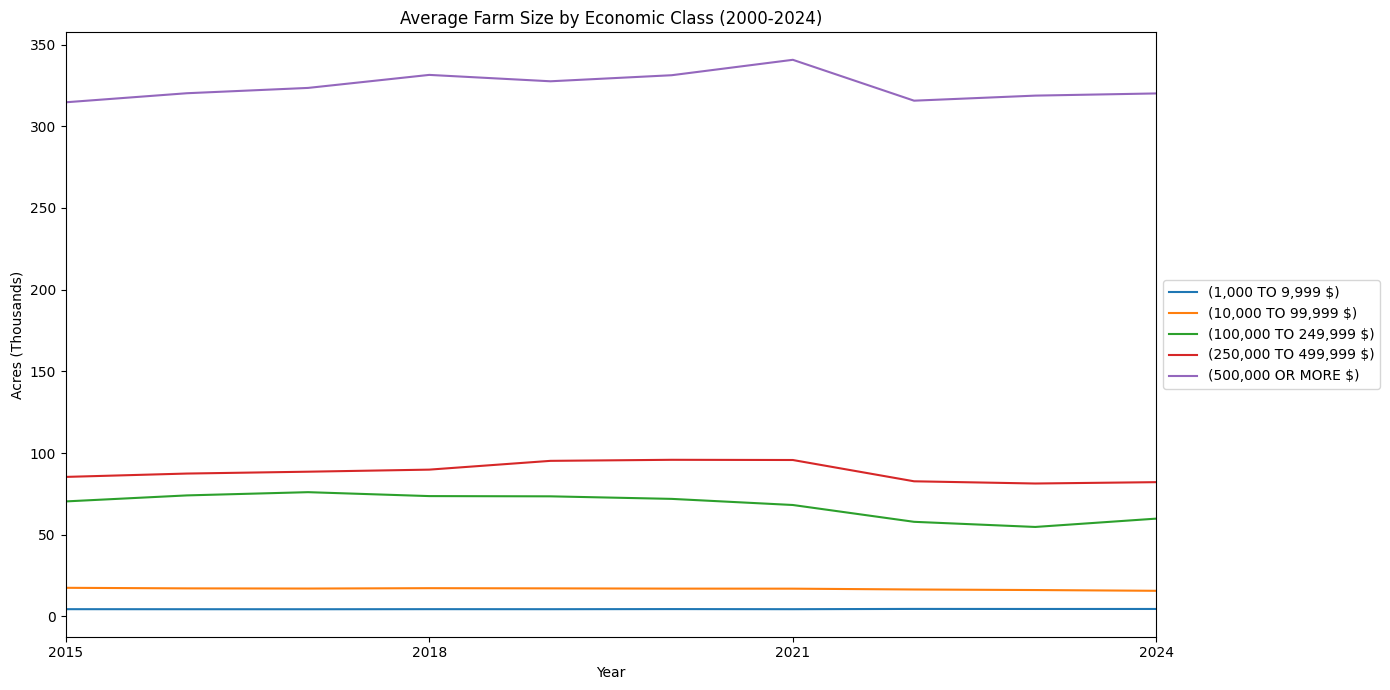

C:\Users\MadiL\AppData\Local\Temp\ipykernel_23688\1566423689.py:70: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped = df_grouped.applymap(lambda x: f"{x:.2f}k")


NameError: name 'class_cols' is not defined

In [ ]:

# Load data
df = pd.read_csv("Farms.csv")

df = df[df["Data Item"] == "FARM OPERATIONS - AREA OPERATED, MEASURED IN ACRES / OPERATION"]

# Clean function
def clean_col(df, col):
    return (
        df[col]
        .astype(str)
        .str.replace(",", "")
        .str.replace(r"\(D\)", "", regex=True)
        .str.strip()
        .replace("", pd.NA)
        .pipe(pd.to_numeric, errors="coerce")
    )

# Clean all used columns
for col in base_classes + list(combo_cols.values())[:-1]:
    if col in df.columns:
        df[col] = clean_col(df, col)

# Create the combined $500k+ column
def combine_high_income(row):
    if pd.notna(row[combo_cols["legacy"]]):
        return row[combo_cols["legacy"]]
    elif pd.notna(row[combo_cols["split_1"]]) or pd.notna(row[combo_cols["split_2"]]):
        return (row[combo_cols["split_1"]] or 0) + (row[combo_cols["split_2"]] or 0)
    return pd.NA

df[combo_cols["combo"]] = df.apply(combine_high_income, axis=1)

# Prepare final dataframe
final_cols = base_classes + [combo_cols["combo"]]
df_final = df[["Year"] + final_cols].copy()
df_final[combo_cols["combo"]] = pd.to_numeric(df_final[combo_cols["combo"]], errors="coerce")

# Group and filter
df_grouped = df_final.groupby("Year").sum(min_count=1).reset_index()
df_grouped = df_grouped[df_grouped["Year"] >= 2015]

# Plot FARM COUNTS
plt.figure(figsize=(14, 7))
for col in df_grouped.columns[1:]:
    series = df_grouped[["Year", col]].copy()
    first_valid_idx = series[col].first_valid_index()
    if first_valid_idx is not None:
        first_valid_year = series.loc[first_valid_idx, "Year"]
        series = series[(series["Year"] >= first_valid_year) & (series["Year"] >= 2000)]
        label = col.split(": ")[1].split("  -")[0] if ": " in col else col.replace("ECONOMIC CLASS: ", "").replace("  -  <b>VALUE</b>", "")
        plt.plot(series["Year"], series[col] / 1e3, label=label)

plt.title("Average Farm Size by Economic Class (2000-2024)")
plt.xlabel("Year")
plt.ylabel("Acres (Thousands)")
plt.xticks(ticks=list(range(2000, 2025, 3)))  # 
plt.xlim(2015, 2024)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()
plt.show()


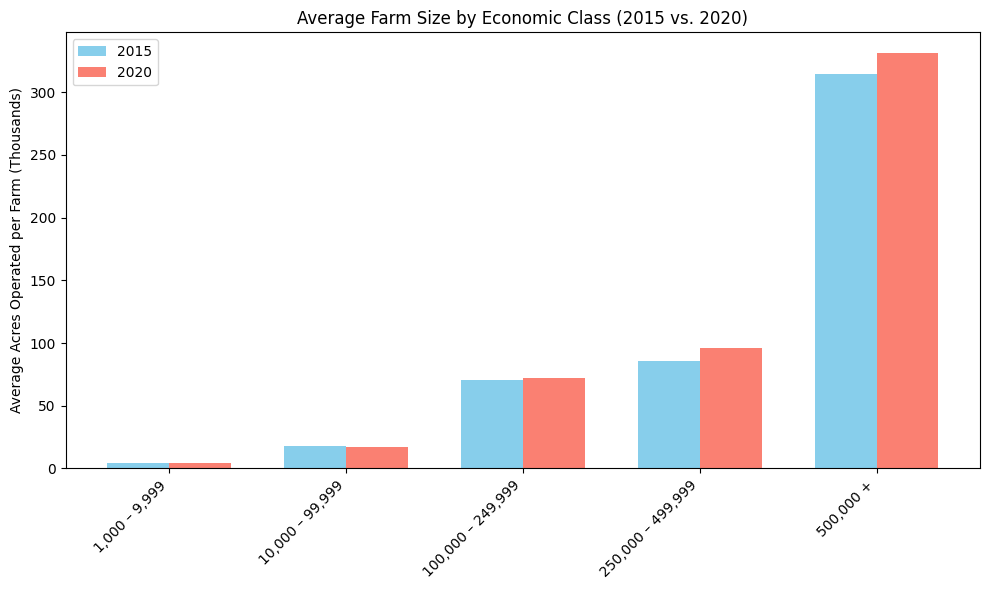

In [9]:
import matplotlib.pyplot as plt
# Group and import matplotlib.pyplot as plt

# Define the years you want to plot
target_years = [2015, 2020]
df_bar = df_grouped[df_grouped["Year"].isin(target_years)]

# Dynamically find all class columns
class_cols = [col for col in df_bar.columns if "ECONOMIC CLASS" in col and "VALUE" in col]

# Clean display labels
labels = [col.split(": ")[1].split("  -")[0].replace("(", "").replace(")", "").replace("$", "").replace("TO", "–").replace("OR MORE", "+").strip() for col in class_cols]

# Extract and scale values
values_2015 = df_bar[df_bar["Year"] == 2015][class_cols].values.flatten() / 1e3
values_2020 = df_bar[df_bar["Year"] == 2020][class_cols].values.flatten() / 1e3

# Plotting
x = range(len(labels))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], values_2015, width=bar_width, label='2015', color='skyblue')
plt.bar([i + bar_width/2 for i in x], values_2020, width=bar_width, label='2020', color='salmon')

plt.xticks(ticks=list(x), labels=labels, rotation=45, ha='right')
plt.ylabel("Average Acres Operated per Farm (Thousands)")
plt.title("Average Farm Size by Economic Class (2015 vs. 2020)")
plt.legend()
plt.tight_layout()
plt.show()



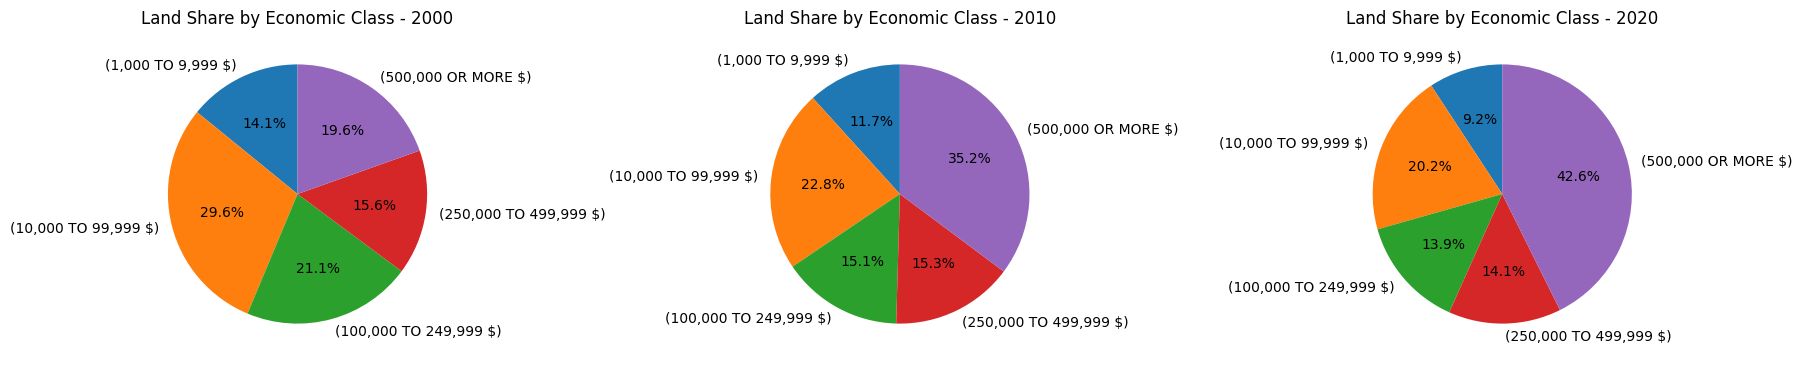

In [ ]:
# Convert to percent share per year
df_percent = df_grouped.copy()
row_totals = df_percent[df_percent.columns[1:]].sum(axis=1)
df_percent[df_percent.columns[1:]] = df_percent[df_percent.columns[1:]].div(row_totals, axis=0) * 100

# Create pie charts for the years 2000, 2010, and 2020
years_to_plot = [2000, 2010, 2020]

# Extract class labels for cleaner pie slices
labels_dict = {
    col: col.split(": ")[1].split("  -")[0] if ": " in col else col.replace("ECONOMIC CLASS: ", "").replace("  -  <b>VALUE</b>", "")
    for col in df_percent.columns[1:]
}

# Generate pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, year in enumerate(years_to_plot):
    data = df_percent[df_percent["Year"] == year]
    values = data.iloc[0, 1:].values
    labels = [labels_dict[col] for col in df_percent.columns[1:]]
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Land Share by Economic Class - {year}")

plt.tight_layout()
plt.show()
